<a href="https://colab.research.google.com/github/RileyWClarke/MLTSA_COVID19/blob/master/COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLTSA COVID-19 Project

In [0]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
% matplotlib inline

In [0]:
plt.style.use("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/master/fbb.mplstyle")

## Data Import/Overview

In [3]:
!pip install kaggle

In [4]:
from google.colab import drive

drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
!pwd

/content


In [6]:
cd gdrive/My\ Drive/

/content/gdrive/My Drive


In [7]:
ls kaggle.json

kaggle.json


In [0]:
!chmod 600 kaggle.json

In [0]:
import json
import os
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [10]:
!kaggle datasets list -s coronavirus

ref                                                     title                                                size  lastUpdated          downloadCount  
------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
unanimad/corona-virus-brazil                            Coronavirus - Brazil                                  6KB  2020-04-01 20:54:36           3772  
jamzing/sars-coronavirus-accession                      SARS CORONAVIRUS ACCESSION                            2MB  2020-02-18 15:49:34           2715  
ardisragen/indonesia-coronavirus-cases                  Indonesia-Coronavirus                                 9KB  2020-04-01 08:36:30            655  
paultimothymooney/coronavirus-genome-sequence           Coronavirus Genome Sequence                           9MB  2020-02-29 00:25:13            856  
gpreda/coronavirus-2019ncov                             Coronavirus 2019-nCoV           

In [11]:
!mkdir COVID19

mkdir: cannot create directory ‘COVID19’: File exists


In [12]:
cd COVID19

/content/gdrive/My Drive/COVID19


In [13]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [14]:
cd data

/content/gdrive/My Drive/COVID19/data


In [15]:
!kaggle datasets download kimjihoo/coronavirusdataset

coronavirusdataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [16]:
ls

Case.csv                PatientRoute.csv  SeoulFloating.csv  TimeGender.csv
coronavirusdataset.zip  Region.csv        TimeAge.csv        TimeProvince.csv
PatientInfo.csv         SearchTrend.csv   Time.csv           Weather.csv


In [17]:
!unzip coronavirusdataset.zip

Archive:  coronavirusdataset.zip
replace Case.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Case.csv                
  inflating: PatientInfo.csv         
  inflating: PatientRoute.csv        
  inflating: Region.csv              
  inflating: SearchTrend.csv         
  inflating: SeoulFloating.csv       
  inflating: Time.csv                
  inflating: TimeAge.csv             
  inflating: TimeGender.csv          
  inflating: TimeProvince.csv        
  inflating: Weather.csv             


In [21]:
time = pd.read_csv('Time.csv')
time.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [22]:
time.shape

(71, 7)

In [0]:
time['date'] = pd.to_datetime(time['date'], format='%Y-%m-%d')

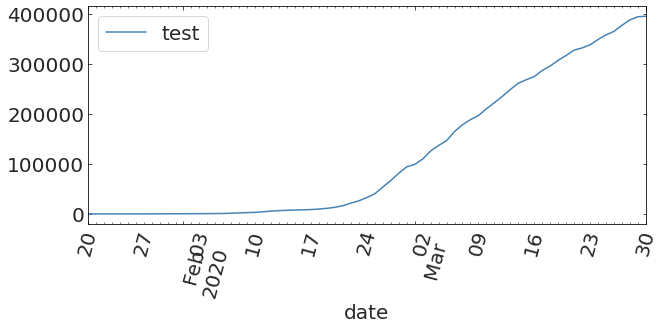

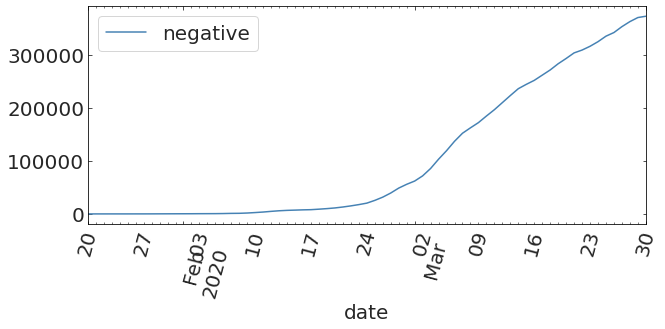

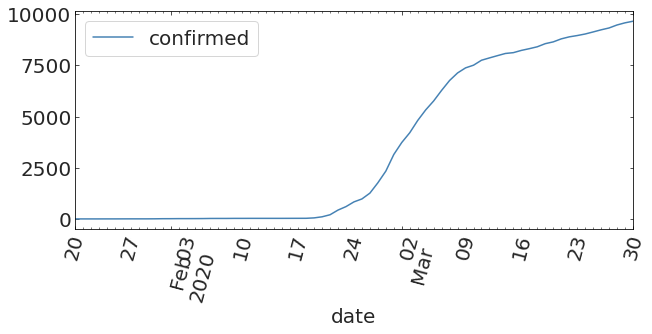

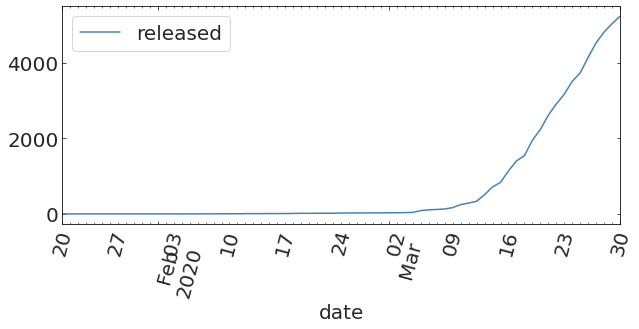

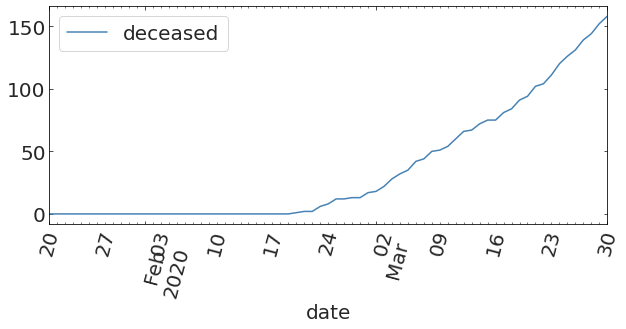

In [25]:
pd.plotting.register_matplotlib_converters()
for c in time.columns[2:]:
    fig, ax = plt.subplots(figsize=(10,4))
    time.plot(x='date', y=c, ax=ax, rot=75)

#Proof-of-concept Plots

In [26]:
!pip install fbprophet
import fbprophet

In [0]:
from fbprophet import Prophet
from fbprophet import diagnostics

In [0]:
time.rename({"confirmed":"y"}, axis=1, inplace=True)
time["ds"] = ts['date']

In [29]:
time.head()

,date,time,test,negative,y,released,deceased,ds
0,2020-01-20,16,1,0,1,0,0,2020-01-20
1,2020-01-21,16,1,0,1,0,0,2020-01-21
2,2020-01-22,16,4,3,1,0,0,2020-01-22
3,2020-01-23,16,22,21,1,0,0,2020-01-23
4,2020-01-24,16,27,25,2,0,0,2020-01-24


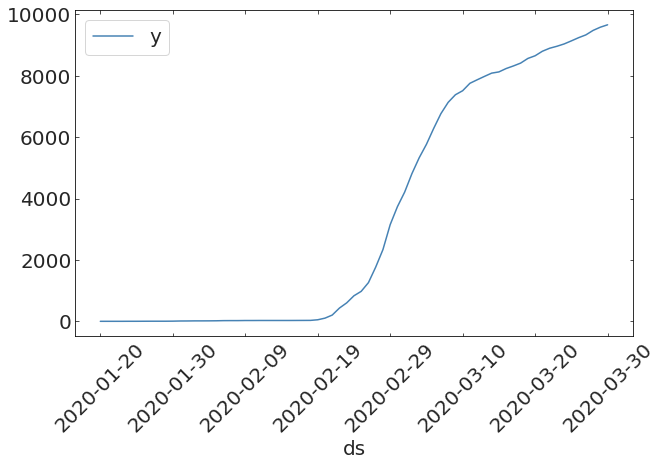

In [31]:
time.plot(x="ds", y="y")
plt.xticks(rotation=45);

## Simple Linear Model

In [33]:
model_1 = Prophet()
model_1.fit(time)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [34]:
future = model_1.make_future_dataframe(periods=30)
forecast = model_1.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
96,2020-04-25,17521.273288,16311.050276,18830.291828
97,2020-04-26,17733.858790,16474.252259,18971.015719
98,2020-04-27,18017.187177,16701.594111,19307.504499
99,2020-04-28,18344.389370,17169.847548,19656.436052
100,2020-04-29,18564.184443,17278.369383,19810.241698


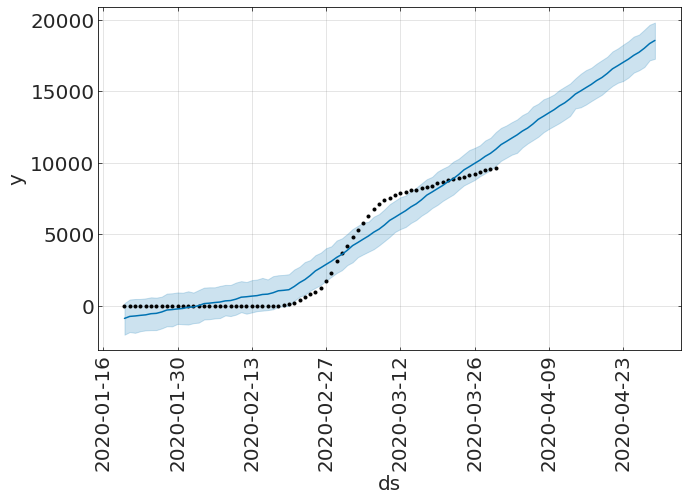

In [35]:
fig1 = model_1.plot(forecast)
plt.xticks(rotation=90);

## Non-Linear Model

In [0]:
time['cap'] = np.full(len(ts),10000)

In [38]:
time.head()

,date,time,test,negative,y,released,deceased,ds,cap
0,2020-01-20,16,1,0,1,0,0,2020-01-20,10000
1,2020-01-21,16,1,0,1,0,0,2020-01-21,10000
2,2020-01-22,16,4,3,1,0,0,2020-01-22,10000
3,2020-01-23,16,22,21,1,0,0,2020-01-23,10000
4,2020-01-24,16,27,25,2,0,0,2020-01-24,10000


In [40]:
model_2 = Prophet(growth="logistic")
model_2.fit(time)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [41]:
future = model_2.make_future_dataframe(periods=30)
future['cap'] = np.full(len(future), 10000)
forecast = model_2.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
96,2020-04-25,10032.308626,9489.120868,10632.781595
97,2020-04-26,10027.777489,9446.151262,10594.425442
98,2020-04-27,10005.893061,9437.877005,10569.074761
99,2020-04-28,9994.454780,9434.160934,10508.992270
100,2020-04-29,9979.159042,9410.467130,10529.322718


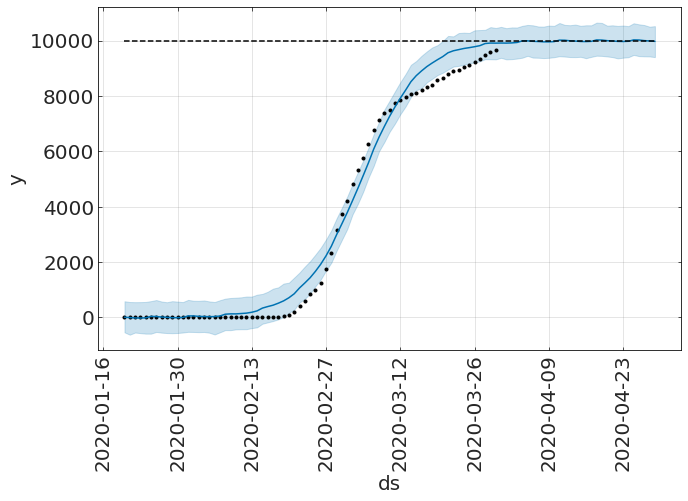

In [42]:
fig2 = model_2.plot(forecast)
plt.xticks(rotation=90);